# Module 3 Assignment

### Sheetal Parikh
EN.605.634.81<br>
September 18, 2022
***
***

For the assignment I used the Reddit scraper provided under the assignment description with a few changes

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Licence" data-toc-modified-id="Licence-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Licence</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Input" data-toc-modified-id="Input-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Input</a></span></li><li><span><a href="#Output" data-toc-modified-id="Output-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Output</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Functions-and-Classes" data-toc-modified-id="Functions-and-Classes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Functions and Classes</a></span></li><li><span><a href="#System-dependent-Configuration" data-toc-modified-id="System-dependent-Configuration-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>System-dependent Configuration</a></span></li></ul></li><li><span><a href="#Collect-Data" data-toc-modified-id="Collect-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Collect Data</a></span><ul class="toc-item"><li><span><a href="#Collect-Reddit-Submissions-and-Comments" data-toc-modified-id="Collect-Reddit-Submissions-and-Comments-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Collect Reddit Submissions and Comments</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

Licence
-------------
Developed by the Discovery Lab, Applied Intelligence Group, Accenture Federal Systems.

```
Copyright (c) 2020 Accenture Federal Systems.

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```


Purpose
-------------
This notebook collects posts and comments, and associated metadata from the [Reddit](https://www.reddit.com/) social media platform. It uses Reddit API through [PRAW](https://praw.readthedocs.io/en/latest/) and requires credentials.


Input
-------------
**Required Parameters**

- _**client\_id**_ (string) - A unique client id provided by Reddit.

- _**client\_secret**_ (string) - Secret associated with client id provided by Reddit.

- _**user\_agent**_ (string) - A unique user agent provided by Reddit.

- _**search\_terms**_ (array of strings) - Search terms.

- _**subreddits**_ (array of strings) - Names of subreddits to search from.


**Optional Parameters**

- _**post\_limit**_ (integer, default: 100, maximum: 1000) - Maximum number of posts to download.


Output
-------------
The outputs are two `CSV` files named `REDDIT_POSTS_{{DATETIME}}.csv` and `REDDIT_COMMENTS_{{DATETIME}}.csv`, where `{{DATETIME}}` is the approximate date/time of the data collection. These `CSV` files are saved in the `{{HOME}}/data/raw/Reddit` folder, where `{{HOME}}` is the project installation folder.

The columns of the output file `REDDIT_POSTS_{{DATETIME}}.csv` is as follows.

- _**author**_ (string) -  Provides an instance of `Redditor`.

- _**clicked**_ (binary) -  Whether or not the submission has been clicked by the client. 

- _**comments**_ (array of strings) -  Provides an instance of `CommentForest`. 

- _**created_utc**_ (datetime) - Time the submission was created, represented in Unix Time. 

- _**distinguished**_ (binary) - Whether or not the submission is distinguished. 

- _**edited**_ (binary) - Whether or not the submission has been edited. 

- _**id**_ (string) - ID of the submission. 

- _**is\_original_content**_ (binary) - Whether or not the submission has been set as original content. 

- _**is\_self**_ (binary) - Whether or not the submission is a selfpost (text-only). 

- _**link\_flair_template\_id**_ (string) - The link flair’s ID, or None if not flaired. 

- _**link\_flair\_text**_ (text) - The link flair’s text content, or None if not flaired. 

- _**locked**_ (binary) - Whether or not the submission has been locked. 

- _**name**_ (string) - Fullname of the submission. 

- _**num\_comments**_ (integer) - The number of comments on the submission. 

- _**over\_18**_ (binary) - Whether or not the submission has been marked as NSFW. 

- _**permalink**_ (string) - A permalink for the submission. 

- _**poll\_data**_ (object) - A PollData object representing the data of this submission, if it is a poll submission. 

- _**score**_ (integer) - The number of upvotes for the submission. 

- _**selftext**_ (text) - The submissions’ selftext - an empty string if a link post. 

- _**spoiler**_ (binary) - Whether or not the submission has been marked as a spoiler. 

- _**stickied**_ (binary) - Whether or not the submission is stickied. 

- _**subreddit**_ (string) - Provides an instance of Subreddit. 

- _**title**_ (text) - The title of the submission. 

- _**upvote\_ratio**_ (double) - The percentage of upvotes from all votes on the submission. 

- _**url**_ (string) - The URL the submission links to, or the permalink if a selfpost. 


The columns of the output file `REDDIT_COMMENTS_{{DATETIME}}.csv` is as follows.

- _**author**_ (string) - Provides an instance of Redditor. 

- _**body**_ (text) -  The body of the comment, as Markdown.

- _**body\_html**_ (text) - The body of the comment, as HTML.

- _**created\_utc**_ (datetime) - Time the comment was created, represented in Unix Time. 

- _**distinguished**_ (binary) - Whether or not the comment is distinguished. 

- _**edited**_ (binary) - Whether or not the comment has been edited. 

- _**id**_ (string) - ID of the comment. 

- _**is\_submitter**_ (binary) - Whether or not the comment author is also the author of the submission. 

- _**link\_id**_ (string) - The submission ID that the comment belongs to. 

- _**parent\_id**_ (string) - The ID of the parent comment (prefixed with t1\_). If it is a top-level comment, this returns the submission ID instead (prefixed with t3\_). 

- _**permalink**_ (string) - A permalink for the comment. Comment objects from the inbox have a context attribute instead. 

- _**replies**_ (integer) - Provides an instance of CommentForest. 

- _**score**_ (integer) - The number of upvotes for the comment. 

- _**stickied**_ (binary) - Whether or not the comment is stickied. 
 
- _**submission**_ (string) - Provides an instance of the submission that the comment belongs to. 

- _**subreddit**_ (string) - Provides an instance of the subreddit that the comment belongs to. 

- _**subreddit\_id**_ (string) - The subreddit ID that the comment belongs to. 


## Imports

In [1]:
"""This cell imports necessary Python modules and performs initial configuration
"""

# Data manipulation libraries
import json
import pandas as pd 
import csv

from IPython.display import set_matplotlib_formats, display, clear_output, HTML
set_matplotlib_formats('retina')
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import VBox, HBox, Button, HTML, Label

# Computation libraries 
import numpy as np
import re
import random

import io
import platform
from pathlib import Path
import os
from getpass import getpass
# from joblib import Parallel, delayed

# Datetime libraries
from datetime import datetime
import time
from pytz import timezone

# Scraping libraries
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup

# Logging
import logging 
logging.basicConfig(level=logging.INFO)

# For Reddit
import praw
from praw.models import MoreComments

#For preprocessing
import nltk
from nltk.corpus import stopwords
from nltk import tokenize
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

from textblob import TextBlob

#for visualization
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
from wordcloud import WordCloud

## Parameters

In [2]:
"""This cell defines global variables and parameters used throughout the playbook
"""

# Set this to True if you want to watch Selenium scrape pages
# WATCH_SCRAPING = True

# Set this to True if you want to use incognito mode
# USE_INCOGNITO = True

# Number of posts 
post_limit = 100

# The data is written 
RAW_DATA_DIRECTORY = Path('/Users/Sheetal/Documents/Sheetal/datasets/')

# Setup logging level
LOGGING_LEVEL = logging.INFO 
logging.basicConfig(level=LOGGING_LEVEL)

## Functions and Classes

In [3]:
"""This cell defines functions and classes used throughout the playbook
"""

def __init__(self, client_id, client_secret, user_agent, password):
    self.client_id = client_id
    self.client_secret = client_secret
    self.user_agent = user_agent
    self.password = password


def token(client_id, client_secret, user_agent):
    reddit = praw.Reddit(client_id=client_id,
                         client_secret=client_secret,
                         user_agent=user_agent)
    if (reddit != False):
        print("Successful token")
    else:
        print("Failed token")
    return reddit


def search_reddit(reddit, search_term, sort_type, time_limit, post_limit):
    """
    GRAB REDDIT POSTS BY SEARCH TERM
    search_term = any boolean search #https://www.reddit.com/dev/api/
    sort_type = 'relevance', 'hot', 'top', 'new', 'comments'
    time_limit = 'all', 'hour', 'day', 'week', 'month', 'year'
    post_limit = 1000 maximum
    """

    posts = []
    subreddit = reddit.subreddit("all")
    for post in subreddit.search(search_term, sort=sort_type, time_filter=time_limit, limit=post_limit):
        posts.append([post.subreddit, post.id, post.title, post.selftext, post.author, post.url, post.permalink,
                      post.num_comments, post.created, post.score, post.distinguished, post.is_original_content,
                      post.upvote_ratio, post.link_flair_text])
    posts = pd.DataFrame(posts,
                         columns=['subreddit', 'post_id', 'title', 'post_body', 'post_author', 'url', 'post_permalink',
                                  'num_comments', 'post_created', 'post_score', 'post_distinguished',
                                  'original_content', 'upvote_ratio', 'flair_text'])
    posts['post_created'] = pd.to_datetime(posts['post_created'], unit='s')
    posts['scrape_time'] = datetime.now()
    posts[['subreddit', 'post_id', 'title', 'post_author',
           'post_body', 'url', 'post_permalink', 'flair_text']] = posts[['subreddit', 'post_id', 'title', 'post_author',
                                                                         'post_body', 'url', 'post_permalink',
                                                                         'flair_text']].astype(str)
    return posts


def get_subreddit(reddit, sub, sort_type, time_limit, post_limit):
    '''
    GRAB REDDIT POSTS BY SUBREDDIT
    sub = subreddits
    sort_type = 'hot', 'top', 'new', 'gilded', 'rising', 'controversial'
    time_limit = 'all', 'hour', 'day', 'week', 'month', 'year'
    post_limit = 1000 maximum
    '''
    subreddit = reddit.subreddit(sub)
    posts = []
    if (sort_type == "top") or (sort_type == "hot") or (sort_type == "controversial"):
        for post in subreddit.top(time_filter=time_limit, limit=post_limit):
            posts.append([post.subreddit, post.id, post.title, post.selftext, post.author, post.url, post.permalink,
                          post.num_comments, post.created, post.score, post.distinguished, post.is_original_content,
                          post.upvote_ratio, post.link_flair_text])

    if (sort_type == "new") or (sort_type == "rising"):
        for post in subreddit.new(limit=post_limit):
            posts.append([post.subreddit, post.id, post.title, post.selftext, post.author, post.url, post.permalink,
                          post.num_comments, post.created, post.score, post.distinguished, post.is_original_content,
                          post.upvote_ratio, post.link_flair_text])

    posts = pd.DataFrame(posts,
                         columns=['subreddit', 'post_id', 'title', 'post_body', 'post_author', 'url', 'post_permalink',
                                  'num_comments', 'post_created', 'post_score', 'post_distinguished',
                                  'original_content', 'upvote_ratio', 'flair_text'])
    posts['post_created'] = pd.to_datetime(posts['post_created'], unit='s')
    posts['scrape_time'] = datetime.now()
    posts[['subreddit', 'post_id', 'title', 'post_author',
           'post_body', 'url', 'post_permalink', 'flair_text', ]] = posts[
        ['subreddit', 'post_id', 'title', 'post_author',
         'post_body', 'url', 'post_permalink', 'flair_text']].astype(str)
    return posts


def get_reddit_comments(reddit, post_id):
    submission = reddit.submission(id=post_id)
    comment = []
    for top_level in submission.comments:
        if isinstance(top_level, MoreComments):
            continue
        comment.append([top_level.subreddit, top_level.submission, top_level.id, top_level.parent_id, top_level.author,
                        top_level.permalink, top_level.body, top_level.created, top_level.score,
                        top_level.distinguished])
    comments = pd.DataFrame(comment, columns=['subreddit', 'post_id', 'comment_id', 'parent_id', 'comment_author',
                                              'comment_permalink', 'comment_body', 'comment_created', 'comment_score',
                                              'comment_distinguished'])
    comments['comment_created'] = pd.to_datetime(comments['comment_created'], unit='s')
    comments['scrape_time'] = datetime.now()
    comments[['subreddit', 'post_id', 'comment_id', 'parent_id',
              'comment_author', 'comment_permalink', 'comment_body']] = comments[
        ['subreddit', 'post_id', 'comment_id', 'parent_id',
         'comment_author', 'comment_permalink', 'comment_body']].astype(str)
    return comments

## System-dependent Configuration

In [4]:
"""This cell defines system-dependent configuration such as those different in Linux vs. Windows
"""

# Get the system information from the OS
PLATFORM_SYSTEM = platform.system()

# Darwin is macOS
if PLATFORM_SYSTEM == "Darwin":
    EXECUTABLE_PATH = Path("../dependencies/chromedriver")
elif PLATFORM_SYSTEM == "Windows":
    EXECUTABLE_PATH = Path("../dependencies/chromedriver.exe")
else:
    logging.critical("Chromedriver not found or Chromedriver is outdated...")
    exit()
    
tz = timezone('US/Eastern')    

# Collect Data

## Collect Reddit Submissions and Comments

In [5]:
import csv
"""This cell retrieves page posts and comments, for a given page.
"""

def main():
    # Credentials (create client_id, client_secret, user_agent by following https://praw.readthedocs.io/en/latest/getting_started/quick_start.html)
    client_id = getpass("Enter client_id: ")
    client_secret = getpass("Enter client secret: ")
    user_agent = input("Enter user agent: ")

    ''' Designate input parameters for functions
    search terms = key terms to search ALL of reddit
    subreddits = subreddits to collect
    search_sort_type = 'relevance', 'hot', 'top', 'new', 'comments'
    sub_sort_type = 'hot', 'top', 'new', 'gilded', 'rising', 'controversial'
    time_limit = 'all', 'hour', 'day', 'week', 'month', 'year'
    post_limit = 10
    '''

    sub_sort_type = 'new'  # , 'top', 'new', 'gilded', 'rising', 'controversial'
    search_sort_type = 'new'  # , 'hot', 'top', 'new', 'comments', 'relevance'
    time_limit = 'year'  # , 'hour', 'day', 'week', 'month', 'year'
      # maximum of 1000

    
    # search_terms = ["covid19", "coronavirus"]
    # subreddits = ["CoronavirusMemes", "Coronavirus", "CoronavirusUS"]

    input_search_terms = input("Enter search terms (seperated by spaces): ")
    search_terms = input_search_terms.split()
    
    input_subreddits = input("Enter subreddits (separated by spaces): ")
    subreddits = input_subreddits.split()
    
    ''' Collect posts & corresponding comments
    '''
    # Create client
    r = token(client_id, client_secret, user_agent)
    list_posts_df = []
    try:
        for query in search_terms:
            post_df = search_reddit(r, query, search_sort_type, time_limit, post_limit)
            print("Grabbed", len(post_df), "posts with search term:", query)
            list_posts_df.append(post_df)
    except:
        pass

    try:
        for sub in subreddits:
            post_df = get_subreddit(r, sub, sub_sort_type, time_limit, post_limit)
            print("Grabbed", len(post_df), "posts from subreddit:", sub)
            list_posts_df.append(post_df)
    except:
        pass

    new_posts = pd.concat(list_posts_df)
    print("Number of posts: ", new_posts.shape[0])

    # File output for posts
    filename_csv = "REDDIT_POSTS_" + datetime.now(tz=tz).strftime("%Y-%m-%dT%H-%M-%S%z") + ".csv"
    new_posts.to_csv(str(RAW_DATA_DIRECTORY / filename_csv), index=False)
    print("Exported posts to CSV")

    # Get comments
    post_ids = new_posts['post_id'].to_list()
    list_comment_dfs = []
    i = 0
    for post in post_ids:
        try:
            comment_df = get_reddit_comments(r, post)
            list_comment_dfs.append(comment_df)
            # print(i, "Grabbed", len(comment_df), "comments from post id:", post)
        except:
            pass
        i += 1
    post_comments = pd.concat(list_comment_dfs)
    print("Number of total comments: ", post_comments.shape[0])

    # File output for comment
    com_filename_csv = "REDDIT_COMMENTS_" + datetime.now(tz=tz).strftime("%Y-%m-%dT%H-%M-%S%z") + ".csv"
    post_comments.to_csv(str(RAW_DATA_DIRECTORY / com_filename_csv), index=False)
    print("Exported comments to CSV")


if __name__ == "__main__":
    main()

client_id = 'jkbzsqb7ox1utiVdtDFODw'
client_secret = '2makjTr6RtXHaM2vfm-_YLwarzAk2w'
user_agent = 'Scraper'

Enter client_id: ········
Enter client secret: ········
Enter user agent: Scraper
Enter search terms (seperated by spaces): biden
Enter subreddits (separated by spaces): politics
Successful token
Grabbed 100 posts with search term: biden
Grabbed 100 posts from subreddit: politics
Number of posts:  200
Exported posts to CSV
Number of total comments:  3071
Exported comments to CSV


In [6]:
posts_path = '/Users/Sheetal/Documents/Sheetal/datasets/REDDIT_POSTS_2022-09-18T19-52-36-0400.csv'
comments_path = '/Users/Sheetal/Documents/Sheetal/datasets/REDDIT_COMMENTS_2022-09-18T19-58-23-0400.csv'

df_posts = pd.read_csv(posts_path)
df_comments = pd.read_csv(comments_path)

## Analyzing Reddit Post Titles

In [7]:
#printing reddit post dataframe
df_posts.head()

,subreddit,post_id,title,post_body,post_author,url,post_permalink,num_comments,post_created,post_score,post_distinguished,original_content,upvote_ratio,flair_text,scrape_time
0,TrendingQuickTVnews,xhvzes,US-China relations: Biden’s biotech plan has l...,NaN,swagNextTuber,https://www.scmp.com/business/companies/articl...,/r/TrendingQuickTVnews/comments/xhvzes/uschina...,0,2022-09-18 23:51:50,1,NaN,False,1.0,None,2022-09-18 19:52:25.802071
1,politics,xhvxu8,"‘Don’t, don’t don’t’: Biden presses Putin on n...",NaN,DewChocolate,https://www.aljazeera.com/news/2022/9/18/dont-...,/r/politics/comments/xhvxu8/dont_dont_dont_bid...,3,2022-09-18 23:49:54,1,NaN,False,1.0,None,2022-09-18 19:52:25.802071
2,Conservative,xhvvht,GOP Voters ‘Virtually Impossible to Poll’ Afte...,NaN,TX_borg,https://www.theepochtimes.com/top-pollster-rep...,/r/Conservative/comments/xhvvht/gop_voters_vir...,1,2022-09-18 23:46:53,8,NaN,False,1.0,None,2022-09-18 19:52:25.802071
3,bestofthefray,xhvsxc,Border Wall Construction Resumes Under Preside...,NaN,PeninsuleCourbet,https://theintercept.com/2022/09/18/biden-trum...,/r/bestofthefray/comments/xhvsxc/border_wall_c...,0,2022-09-18 23:43:36,1,NaN,False,1.0,None,2022-09-18 19:52:25.802071
4,AutoNewspaper,xhvqgd,"[World] - Biden, World Leaders Gather in Londo...",NaN,AutoNewspaperAdmin,https://english.chosun.com/site/data/html_dir/...,/r/AutoNewspaper/comments/xhvqgd/world_biden_w...,0,2022-09-18 23:40:33,1,NaN,False,1.0,None,2022-09-18 19:52:25.802071


As expected, the keyword "Biden" shows most commonly under the politics subreddit

In [8]:
#checking number of subreddits that contain Biden

df_posts.subreddit.value_counts()

politics                 103
AutoNewspaper              9
newsbotbot                 3
u_Far-Glass                2
apoa3                      2
                        ... 
TopConspiracy              1
LegalizeFreedom            1
worldnewsindex             1
thefunhouseofideology      1
Triblive                   1
Name: subreddit, Length: 78, dtype: int64

In [9]:
#checking the posts per author

df_posts.post_author.value_counts()

AutoNewspaperAdmin     9
AutoNewsAdmin          9
NavyCorpsmanRetiree    7
gotostep2              6
progress18             4
                      ..
1angrylittlevoice      1
PapaJohnStrikesBack    1
phnewsfeed             1
southpawFA             1
Genedide               1
Name: post_author, Length: 132, dtype: int64

As can be seen below, the title, post_score, num_comments, and upvote_ratio do not have null values. I will be using these factors in my analysis.

In [10]:
#check if there are any nulls
df_posts.isnull().sum()

subreddit               0
post_id                 0
title                   0
post_body             189
post_author             0
url                     0
post_permalink          0
num_comments            0
post_created            0
post_score              0
post_distinguished    200
original_content        0
upvote_ratio            0
flair_text              0
scrape_time             0
dtype: int64

The number of comments and the post score appear to be having a direct relationship overall.  Post titles that were extracted are all recent.  Pulling the titles from older posts may have helped show a better representation between the score and number of comments

(0.0, 2000.0)

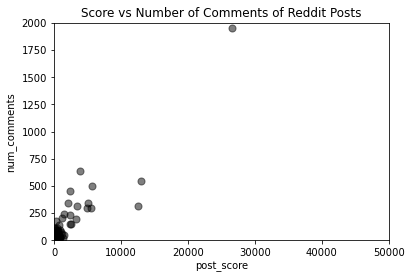

In [11]:
#import matplotlib.pyplot as plt
#plotting the number of post score vs the number of comments

ax=df_posts.plot.scatter(x='post_score',y='num_comments',s=50,c='k',alpha=.5, 
                         title = "Score vs Number of Comments of Reddit Posts")
ax.set_xlim((0,50000))
ax.set_ylim((0,2000))

The plots of the post score versus the upvote ratio and the number of comments versus the upvote ratio are very similar. Newer posts would have less comments which may cause the upvote ratio to be higher or lower than would it be over time. The posts are very new so it would have been better to look at posts from a range of days to check the relationship. A few posts with higher post score and number of comments have a lower upvote ratio.  These posts may be controversial causing the score and number of comments to have an inverse relationsip with the upvote ratio.

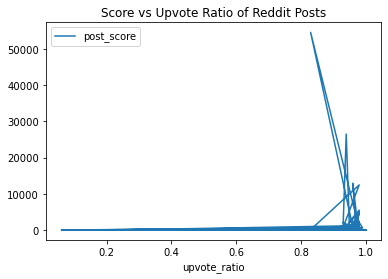

In [12]:
#plotting the post score vs the upvote rate

ax2=df_posts.plot.line(x='upvote_ratio',y='post_score', title = "Score vs Upvote Ratio of Reddit Posts")

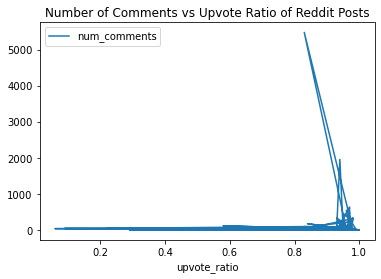

In [13]:
#plotting the number of comments verseus the upvote ratio

ax2=df_posts.plot.line(x='upvote_ratio',y='num_comments', title = "Number of Comments vs Upvote Ratio of Reddit Posts")

#### Sentiment Analysis of Reddit Headlines

In [14]:
#make a dataframe for only the headlines

df_headlines = df_posts[['title']].copy()
df_headlines.head()

,title
0,US-China relations: Biden’s biotech plan has l...
1,"‘Don’t, don’t don’t’: Biden presses Putin on n..."
2,GOP Voters ‘Virtually Impossible to Poll’ Afte...
3,Border Wall Construction Resumes Under Preside...
4,"[World] - Biden, World Leaders Gather in Londo..."


In [15]:
#will convert contractions into it's original word combination

def removeContractions(s):
    s = re.sub(r"can\'t", "can not",s)
    s = re.sub(r"couldn't", "can not",s)
    s = re.sub(r"won't", "will not",s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r"wouldn't", "would not",s)
    s = re.sub(r"\'d", "would",s)
    s = re.sub(r"\'s", " is", s)
    s = re.sub(r"\'re", " are", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"\'m", " am", s)
    s = re.sub(r"n\'t", " not", s)
    s = re.sub(r"\'t", " not", s)
    return s

In [16]:
#import nltk
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from collections import Counter
#from nltk.stem import WordNetLemmatizer

#function for preprocessing 

def preprocess(df):
    #lowercase
    df['fix_lowercase'] = df['title'].apply(lambda x: " ".join(word.lower() for word in x.split()))
    
    #contractions
    df['fix_contractions'] = df['fix_lowercase'].apply(lambda x:removeContractions(x))
    
    #punctuation
    df['fix_punctuation'] = df['fix_contractions'].str.replace('[^\w\s]', '')
    
    #lemmatized
    lemmatizer = WordNetLemmatizer()
    df['lemmatized'] = df['fix_punctuation'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
    
    stop_words = stopwords.words('english')
    #df['num_stopwords'] = df['lemmatized'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
    df['fix_stopwords'] = df['lemmatized'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

    return df

In [22]:
#preprocessing post titles 

df = preprocess(df_headlines)
df_sent = df
df_sent.head()

,title,fix_lowercase,fix_contractions,fix_punctuation,lemmatized,fix_stopwords
0,US-China relations: Biden’s biotech plan has l...,us-china relations: biden’s biotech plan has l...,us-china relations: biden’s biotech plan has l...,uschina relations bidens biotech plan has limi...,uschina relation bidens biotech plan ha limite...,uschina relation bidens biotech plan ha limite...
1,"‘Don’t, don’t don’t’: Biden presses Putin on n...","‘don’t, don’t don’t’: biden presses putin on n...","‘don’t, don’t don’t’: biden presses putin on n...",dont dont dont biden presses putin on nuclear ...,dont dont dont biden press putin on nuclear we...,dont dont dont biden press putin nuclear weapon
2,GOP Voters ‘Virtually Impossible to Poll’ Afte...,gop voters ‘virtually impossible to poll’ afte...,gop voters ‘virtually impossible to poll’ afte...,gop voters virtually impossible to poll after ...,gop voter virtually impossible to poll after b...,gop voter virtually impossible poll bidens mag...
3,Border Wall Construction Resumes Under Preside...,border wall construction resumes under preside...,border wall construction resumes under preside...,border wall construction resumes under preside...,border wall construction resume under presiden...,border wall construction resume president joe ...
4,"[World] - Biden, World Leaders Gather in Londo...","[world] - biden, world leaders gather in londo...","[world] - biden, world leaders gather in londo...",world biden world leaders gather in london fo...,world biden world leader gather in london for ...,world biden world leader gather london funeral...


After making all the titles lowercase, removing stop words, punctuation and contractions, the resulting wording is under 
the fix_stopwords column

In [23]:
#from nltk import tokenize

#making sure that the titles are separated into sentences

df_sent["fix_stopwords"] = [tokenize.sent_tokenize(item) for item in df_sent.fix_stopwords]
df_sent1 = df_sent.explode("fix_stopwords").reset_index(drop = True)
df_sent1.head()

,title,fix_lowercase,fix_contractions,fix_punctuation,lemmatized,fix_stopwords
0,US-China relations: Biden’s biotech plan has l...,us-china relations: biden’s biotech plan has l...,us-china relations: biden’s biotech plan has l...,uschina relations bidens biotech plan has limi...,uschina relation bidens biotech plan ha limite...,uschina relation bidens biotech plan ha limite...
1,"‘Don’t, don’t don’t’: Biden presses Putin on n...","‘don’t, don’t don’t’: biden presses putin on n...","‘don’t, don’t don’t’: biden presses putin on n...",dont dont dont biden presses putin on nuclear ...,dont dont dont biden press putin on nuclear we...,dont dont dont biden press putin nuclear weapon
2,GOP Voters ‘Virtually Impossible to Poll’ Afte...,gop voters ‘virtually impossible to poll’ afte...,gop voters ‘virtually impossible to poll’ afte...,gop voters virtually impossible to poll after ...,gop voter virtually impossible to poll after b...,gop voter virtually impossible poll bidens mag...
3,Border Wall Construction Resumes Under Preside...,border wall construction resumes under preside...,border wall construction resumes under preside...,border wall construction resumes under preside...,border wall construction resume under presiden...,border wall construction resume president joe ...
4,"[World] - Biden, World Leaders Gather in Londo...","[world] - biden, world leaders gather in londo...","[world] - biden, world leaders gather in londo...",world biden world leaders gather in london fo...,world biden world leader gather in london for ...,world biden world leader gather london funeral...


In [19]:
#function using Textblob for sentiment polarity to determine whether the title is negative, positive, 
    #or netural

#from textblob import TextBlob

def determine_sentiment(text):
    blob = TextBlob(text)
    sent_polarity = blob.sentiment.polarity 
    if sent_polarity > 0:
        sent_label = "positive"
    elif sent_polarity < 0:
        sent_label = "negative"
    else:
        sent_label = "neutral"
    #storing sentiment lable into dictionary
    result = {"sentiment": sent_label}
    return result 

Columns are added to the dataframe for the type of sentiment for the title.  The sentiment was determined using Texblob

In [24]:
#using determine_sentiment and adding a column to dataframe
df_sent1["sentiment_result"] = df_sent1.fix_stopwords.apply(determine_sentiment)

#spliting into columns 
sent = pd.json_normalize(df_sent1["sentiment_result"])

#concatenating both dataframes
df1 = pd.concat([df_sent1,sent], axis = 1)
df1.head()

,title,fix_lowercase,fix_contractions,fix_punctuation,lemmatized,fix_stopwords,sentiment_result,sentiment
0,US-China relations: Biden’s biotech plan has l...,us-china relations: biden’s biotech plan has l...,us-china relations: biden’s biotech plan has l...,uschina relations bidens biotech plan has limi...,uschina relation bidens biotech plan ha limite...,uschina relation bidens biotech plan ha limite...,{'sentiment': 'negative'},negative
1,"‘Don’t, don’t don’t’: Biden presses Putin on n...","‘don’t, don’t don’t’: biden presses putin on n...","‘don’t, don’t don’t’: biden presses putin on n...",dont dont dont biden presses putin on nuclear ...,dont dont dont biden press putin on nuclear we...,dont dont dont biden press putin nuclear weapon,{'sentiment': 'neutral'},neutral
2,GOP Voters ‘Virtually Impossible to Poll’ Afte...,gop voters ‘virtually impossible to poll’ afte...,gop voters ‘virtually impossible to poll’ afte...,gop voters virtually impossible to poll after ...,gop voter virtually impossible to poll after b...,gop voter virtually impossible poll bidens mag...,{'sentiment': 'negative'},negative
3,Border Wall Construction Resumes Under Preside...,border wall construction resumes under preside...,border wall construction resumes under preside...,border wall construction resumes under preside...,border wall construction resume under presiden...,border wall construction resume president joe ...,{'sentiment': 'neutral'},neutral
4,"[World] - Biden, World Leaders Gather in Londo...","[world] - biden, world leaders gather in londo...","[world] - biden, world leaders gather in londo...",world biden world leaders gather in london fo...,world biden world leader gather in london for ...,world biden world leader gather london funeral...,{'sentiment': 'neutral'},neutral


We can see in the chart below that the reddit titles are primarily classified as neutral.

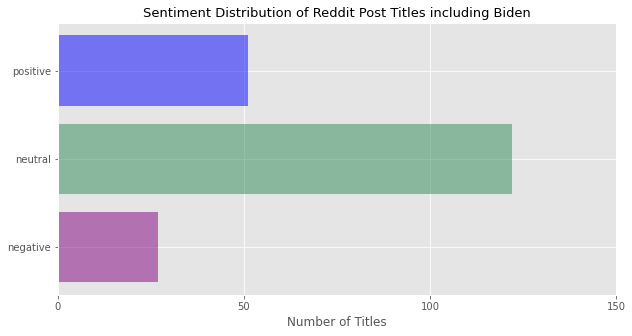

In [32]:
#import matplotlib.pyplot as plt 
#from matplotlib.pyplot import figure
#import seaborn as sns

#plotting the number of titles with a negative, positive, or netural sentiment

plt.style.use("ggplot")

positive = len(df1[df1.sentiment == "positive"])
negative = len(df1[df1.sentiment == "negative"])
neutral = len(df1[df1.sentiment == "neutral"])

sent = [positive, neutral, negative]
sent2 = ["positive", "neutral", "negative"]

sent.reverse()
sent2.reverse()

fig, ax = plt.subplots(figsize=(10,5))

palette = ["purple", "seagreen", "blue"]

hbars = plt.barh(sent2, sent, color = palette, alpha = 0.5)

plt.xticks(np.arange(0,200,50).tolist())

plt.xlabel("Number of Titles")
plt.title("Sentiment Distribution of Reddit Post Titles including Biden", size = 13)
plt.show()

After seeing the there are mostly neutral titles, we can also look into what words are the most common in the titles.  We can also determine what part of speech the word is for further context.

In [33]:
#creating dataframe of ony the title and sentiment

df2 = df1[["fix_stopwords", "sentiment"]]
df2.head()

,fix_stopwords,sentiment
0,uschina relation bidens biotech plan ha limite...,negative
1,dont dont dont biden press putin nuclear weapon,neutral
2,gop voter virtually impossible poll bidens mag...,negative
3,border wall construction resume president joe ...,neutral
4,world biden world leader gather london funeral...,neutral


In [34]:
df_token = df2.copy()

#tokenizing
df_token["fix_stopwords"] = df_token.apply(lambda row: nltk.word_tokenize(row['fix_stopwords']), axis=1)

#removing blanks
df_token["fix_stopwords"] = [[i for i in item if i != ""] for item in df_token.fix_stopwords]

df_token.head()

,fix_stopwords,sentiment
0,"[uschina, relation, bidens, biotech, plan, ha,...",negative
1,"[dont, dont, dont, biden, press, putin, nuclea...",neutral
2,"[gop, voter, virtually, impossible, poll, bide...",negative
3,"[border, wall, construction, resume, president...",neutral
4,"[world, biden, world, leader, gather, london, ...",neutral


In [35]:
#import nltk
#nltk.download('averaged_perceptron_tagger')
#process sequence of words using pos_tag()
#from nltk import pos_tag

#marking the words in the title as a part of speech using pos_tag

df_token["fix_stopwords"] = [nltk.pos_tag(item) for item in df_token.fix_stopwords]
df_token.head()

,fix_stopwords,sentiment
0,"[(uschina, JJ), (relation, NN), (bidens, NNS),...",negative
1,"[(dont, NN), (dont, NN), (dont, JJ), (biden, J...",neutral
2,"[(gop, NN), (voter, NN), (virtually, RB), (imp...",negative
3,"[(border, NN), (wall, NN), (construction, NN),...",neutral
4,"[(world, NN), (biden, NN), (world, NN), (leade...",neutral


In [37]:
#stemming and separating into different columns

#from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')

df_token["title_words"] = [[stemmer.stem(i[0]) for i in item] for item in df_token.fix_stopwords]
df_token["title_speech"] = [[i[1] for i in item] for item in df_token.fix_stopwords]

df_token["title_words"] = [[re.sub(r"[^\w']", '', i) for i in item] for item in df_token.title_words]
df_token["title_speech"] = [[re.sub(r"[^\w']", '', i) for i in item] for item in df_token.title_speech]
df_token.head()

,fix_stopwords,sentiment,title_words,title_speech
0,"[(uschina, JJ), (relation, NN), (bidens, NNS),...",negative,"[uschina, relat, biden, biotech, plan, ha, lim...","[JJ, NN, NNS, VBP, NN, VBP, JJ, JJ, NN, JJ, NN..."
1,"[(dont, NN), (dont, NN), (dont, JJ), (biden, J...",neutral,"[dont, dont, dont, biden, press, putin, nuclea...","[NN, NN, JJ, JJ, NN, NN, JJ, NN]"
2,"[(gop, NN), (voter, NN), (virtually, RB), (imp...",negative,"[gop, voter, virtual, imposs, poll, biden, mag...","[NN, NN, RB, JJ, NN, VBZ, JJ, JJ, NN, NN, NN]"
3,"[(border, NN), (wall, NN), (construction, NN),...",neutral,"[border, wall, construct, resum, presid, joe, ...","[NN, NN, NN, NN, NN, NN, NN]"
4,"[(world, NN), (biden, NN), (world, NN), (leade...",neutral,"[world, biden, world, leader, gather, london, ...","[NN, NN, NN, NN, NN, JJ, JJ, NN, VBZ, JJ, NN, NN]"


In [38]:
#separating the title words and speech into separate columns

df_token2 = df_token[["sentiment", "title_words", "title_speech"]]
df_token2 = df_token2.apply(pd.Series.explode)
df_token2.head()

,sentiment,title_words,title_speech
0,negative,uschina,JJ
0,negative,relat,NN
0,negative,biden,NNS
0,negative,biotech,VBP
0,negative,plan,NN


In [39]:
#grouping and counting the amount of each word

#making sure no blanks
df_token3 = df_token2[df_token2.title_words != ""]

df_token3 = df_token3.groupby(["sentiment","title_words", "title_speech"])["title_words"].count().reset_index(name = "total")
df_token3.sort_values(["sentiment", "total"], ascending = [False, False], inplace = True)

In [40]:
#displaying resulting table

df_token3.head()

,sentiment,title_words,title_speech,total
946,positive,biden,JJ,12
1142,positive,queen,JJ,12
1122,positive,pay,NN,11
1220,positive,true,JJ,9
1227,positive,use,VBN,9


Some of the top words used for reddit post titles including Biden are the Queen, pay and world. Biden is used in several parts of speech and is primarily used with a neutral sentiment.  Because of the Queen's funeral, she must also be used frequently in posts. The terms that are used more negatively are also Biden, gop, and migrant. 

In [42]:
#selecting top 10 words from each sentiment
df_top = df_token3.groupby("sentiment").head(10)
df_top.reset_index(inplace = True)
#df_top["comment_1_2"] = df_top["comment_1"] + " - " + df_top["comment_2"]
df_top

,index,sentiment,title_words,title_speech,total
0,946,positive,biden,JJ,12
1,1142,positive,queen,JJ,12
2,1122,positive,pay,NN,11
3,1220,positive,true,JJ,9
4,1227,positive,use,VBN,9
5,947,positive,biden,NN,8
6,949,positive,biden,RB,8
7,963,positive,chines,JJ,8
8,966,positive,compani,NN,8
9,1009,positive,fact,NN,8


We can see a better visualization of the common words used for all sentiments as well as specifically for positive and negative sentiments.  Biden and Migrant appear the most prominent for negative sentiment words and Queen Elizabeth and Biden are used for positive sentiments.

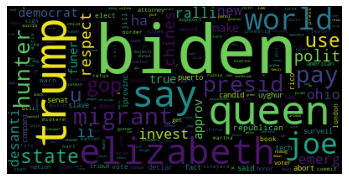

In [43]:
from wordcloud import WordCloud
# Create a word cloud of all words

titles = df_token2['title_words'].value_counts().to_dict()
wc = WordCloud().generate_from_frequencies(titles)

plt.imshow(wc)
plt.axis('off')
plt.show()

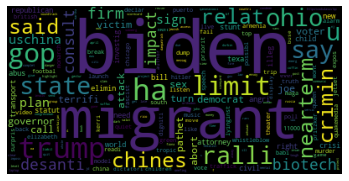

In [44]:
#wordcloud of negative words
negative = df_token2.loc[(df_token2['sentiment'] == 'negative')] 
titles_neg = negative['title_words'].value_counts().to_dict()
wc_neg = WordCloud().generate_from_frequencies(titles_neg)

plt.imshow(wc_neg)
plt.axis('off')
plt.show()

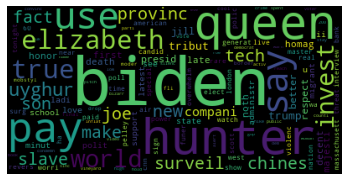

In [45]:
#wordcloud of positive words
positive = df_token2.loc[(df_token2['sentiment'] == 'positive')] 
titles_pos = positive['title_words'].value_counts().to_dict()
wc_pos = WordCloud().generate_from_frequencies(titles_pos)

plt.imshow(wc_pos)
plt.axis('off')
plt.show()

## Analyzing Reddit Comments under Politics Subreddit

For the reddit comments we will check whether we have more comments that are classified as positive, netural, or negative.

In [51]:
#visualizing the reddit comments
df_comments.head()

,subreddit,post_id,comment_id,parent_id,comment_author,comment_permalink,comment_body,comment_created,comment_score,comment_distinguished,scrape_time
0,politics,xhvxu8,iozxh6h,t3_xhvxu8,AutoModerator,/r/politics/comments/xhvxu8/dont_dont_dont_bid...,"\nAs a reminder, this subreddit [is for civil ...",2022-09-18 23:49:54,1,moderator,2022-09-18 19:52:57.160239
1,politics,xhvxu8,iozxpde,t3_xhvxu8,Unclehomer69420,/r/politics/comments/xhvxu8/dont_dont_dont_bid...,"I'm reminded of the Frank Castle ""No, no, no; ...",2022-09-18 23:51:34,1,NaN,2022-09-18 19:52:57.160239
2,politics,xhvxu8,iozxp8n,t3_xhvxu8,JadedIT_Tech,/r/politics/comments/xhvxu8/dont_dont_dont_bid...,If Russia resorts to actually using nuclear we...,2022-09-18 23:51:32,1,NaN,2022-09-18 19:52:57.160239
3,Conservative,xhvvht,iozxp6q,t3_xhvvht,throoawyyy,/r/Conservative/comments/xhvvht/gop_voters_vir...,Paywall,2022-09-18 23:51:31,1,NaN,2022-09-18 19:53:07.316075
4,u_Hades_adhbik,xhv6id,iozsxcl,t3_xhv6id,Hades_adhbik,/r/u_Hades_adhbik/comments/xhv6id/biden_says_h...,"if Xi doesn't help, because russia's default i...",2022-09-18 23:16:24,1,NaN,2022-09-18 19:55:12.458708


The only null values are under the comment_distinguished column.  Only the comment_body column will be used so the 
comment_distinguished column will not be changed.

In [52]:
#checking for null values

df_comments.isnull().sum()

subreddit                   0
post_id                     0
comment_id                  0
parent_id                   0
comment_author              0
comment_permalink           0
comment_body                0
comment_created             0
comment_score               0
comment_distinguished    2963
scrape_time                 0
dtype: int64

In [53]:
#creating a dataframe with only the comment body

comments = df_comments[['comment_body']].copy()
comments.head()

,comment_body
0,"\nAs a reminder, this subreddit [is for civil ..."
1,"I'm reminded of the Frank Castle ""No, no, no; ..."
2,If Russia resorts to actually using nuclear we...
3,Paywall
4,"if Xi doesn't help, because russia's default i..."


In [54]:
#preprocessing the comment_body so that we can do sentiment analysis
comments.columns = ['title']
df_com = preprocess(comments)

#making sure comments are separate sentences and tokenized
df_com["fix_stopwords"] = [tokenize.sent_tokenize(item) for item in df_com.fix_stopwords]
df_com2 = df_com.explode("fix_stopwords").reset_index(drop = True)

#printing resulting dataframe
df_com.head()

,title,fix_lowercase,fix_contractions,fix_punctuation,lemmatized,fix_stopwords
0,"\nAs a reminder, this subreddit [is for civil ...","as a reminder, this subreddit [is for civil di...","as a reminder, this subreddit [is for civil di...",as a reminder this subreddit is for civil disc...,a a reminder this subreddit is for civil discu...,[reminder subreddit civil discussionrpoliticsw...
1,"I'm reminded of the Frank Castle ""No, no, no; ...","i'm reminded of the frank castle ""no, no, no; ...","i am reminded of the frank castle ""no, no, no;...",i am reminded of the frank castle no no no wai...,i am reminded of the frank castle no no no wai...,[reminded frank castle wait wait wait meme rea...
2,If Russia resorts to actually using nuclear we...,if russia resorts to actually using nuclear we...,if russia resorts to actually using nuclear we...,if russia resorts to actually using nuclear we...,if russia resort to actually using nuclear wea...,[russia resort actually using nuclear weapon e...
3,Paywall,paywall,paywall,paywall,paywall,[paywall]
4,"if Xi doesn't help, because russia's default i...","if xi doesn't help, because russia's default i...","if xi does not help, because russia is default...",if xi does not help because russia is default ...,if xi doe not help because russia is default i...,[xi doe help russia default part strategy put ...


In [55]:
#using determine_sentiment and adding a column to dataframe
df_com2["sentiment_result"] = df_com["fix_stopwords"].apply(lambda x: determine_sentiment(' '.join(x)))

#making sure no columns have null values after preprocessing
df_com2.dropna()

#splitting into columns
sentiment2 = pd.json_normalize(df_com2["sentiment_result"])

#concatenating both dataframes
comments1 = pd.concat([df_com2,sentiment2], axis = 1)
comments1.head()

,title,fix_lowercase,fix_contractions,fix_punctuation,lemmatized,fix_stopwords,sentiment_result,sentiment
0,"\nAs a reminder, this subreddit [is for civil ...","as a reminder, this subreddit [is for civil di...","as a reminder, this subreddit [is for civil di...",as a reminder this subreddit is for civil disc...,a a reminder this subreddit is for civil discu...,reminder subreddit civil discussionrpoliticswi...,{'sentiment': 'positive'},positive
1,"I'm reminded of the Frank Castle ""No, no, no; ...","i'm reminded of the frank castle ""no, no, no; ...","i am reminded of the frank castle ""no, no, no;...",i am reminded of the frank castle no no no wai...,i am reminded of the frank castle no no no wai...,reminded frank castle wait wait wait meme reason,{'sentiment': 'neutral'},neutral
2,If Russia resorts to actually using nuclear we...,if russia resorts to actually using nuclear we...,if russia resorts to actually using nuclear we...,if russia resorts to actually using nuclear we...,if russia resort to actually using nuclear wea...,russia resort actually using nuclear weapon ev...,{'sentiment': 'negative'},negative
3,Paywall,paywall,paywall,paywall,paywall,paywall,{'sentiment': 'neutral'},neutral
4,"if Xi doesn't help, because russia's default i...","if xi doesn't help, because russia's default i...","if xi does not help, because russia is default...",if xi does not help because russia is default ...,if xi doe not help because russia is default i...,xi doe help russia default part strategy put u...,{'sentiment': 'positive'},positive


In [56]:
#split result (stored as dictionary) into individual key columns 
sentiment2 = pd.json_normalize(df_com2["sentiment_result"])

#concatenate both dataframe together horizontally
comments1 = pd.concat([df_com2,sentiment2], axis = 1)
comments1.head()

,title,fix_lowercase,fix_contractions,fix_punctuation,lemmatized,fix_stopwords,sentiment_result,sentiment
0,"\nAs a reminder, this subreddit [is for civil ...","as a reminder, this subreddit [is for civil di...","as a reminder, this subreddit [is for civil di...",as a reminder this subreddit is for civil disc...,a a reminder this subreddit is for civil discu...,reminder subreddit civil discussionrpoliticswi...,{'sentiment': 'positive'},positive
1,"I'm reminded of the Frank Castle ""No, no, no; ...","i'm reminded of the frank castle ""no, no, no; ...","i am reminded of the frank castle ""no, no, no;...",i am reminded of the frank castle no no no wai...,i am reminded of the frank castle no no no wai...,reminded frank castle wait wait wait meme reason,{'sentiment': 'neutral'},neutral
2,If Russia resorts to actually using nuclear we...,if russia resorts to actually using nuclear we...,if russia resorts to actually using nuclear we...,if russia resorts to actually using nuclear we...,if russia resort to actually using nuclear wea...,russia resort actually using nuclear weapon ev...,{'sentiment': 'negative'},negative
3,Paywall,paywall,paywall,paywall,paywall,paywall,{'sentiment': 'neutral'},neutral
4,"if Xi doesn't help, because russia's default i...","if xi doesn't help, because russia's default i...","if xi does not help, because russia is default...",if xi does not help because russia is default ...,if xi doe not help because russia is default i...,xi doe help russia default part strategy put u...,{'sentiment': 'positive'},positive


As seen below we more of the comments are positive and neutral rather than negative. 

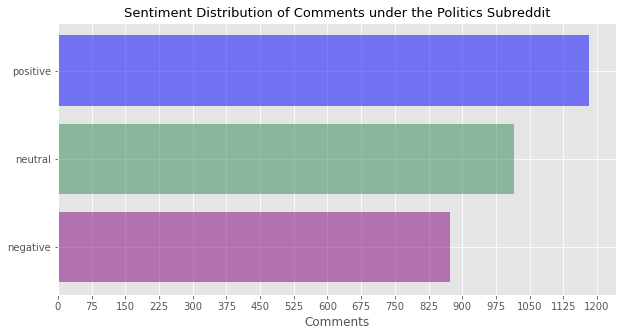

In [59]:
#plotting the number of reddit comments with a negative, positive, or netural sentiment

plt.style.use("ggplot")

positive = len(comments1[comments1.sentiment == "positive"])
negative = len(comments1[comments1.sentiment == "negative"])
neutral = len(comments1[comments1.sentiment == "neutral"])

sent = [positive, neutral, negative]
sent2 = ["positive", "neutral", "negative"]

sent.reverse()
sent2.reverse()

fig, ax = plt.subplots(figsize=(10,5))

palette = ["purple", "seagreen", "blue"]

hbars = plt.barh(sent2, sent, color = palette, alpha = 0.5)

plt.xticks(np.arange(0,1250,75).tolist())

plt.xlabel("Comments")
plt.title("Sentiment Distribution of Comments under the Politics Subreddit", size = 13)
plt.show()

### Conclusion

Overall I was expecting to see more negative words or comments than positive or neutral in reddit.  It's possible we would see more negative comments or titles with older posts than ones that are new. Also with comments, people posting are probably using many words that are abbreviations or slang that may have been missed by how I was preprocessing the comments.  As said earlier, it would be interesting to go through older posts and compare to see if there are still more positive or neutral posts using the same method.  Possibly, another method of sentiment analysis could be used to compare to the method I used.

### References

https://deepnote.com/@deepnote/Mining-and-Exploring-Reddit-Data-using-Python-adf67b4d-1440-4f6b-a7a4-2a94e9e81a28

https://medium.com/swlh/scraping-reddit-using-python-57e61e322486

https://medium.com/@BW.benward/reddit-web-scraping-data-analysis-walkthrough-bd8345f7fae3

https://www.dataknowsall.com/pos.html 

https://www.guru99.com/pos-tagging-chunking-nltk.html

https://levelup.gitconnected.com/reddit-sentiment-analysis-with-python-c13062b862f6

https://towardsdatascience.com/a-game-of-words-vectorization-tagging-and-sentiment-analysis-c78ff9a07e42

https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6
